In [23]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn 

In [201]:
x = torch.linspace(0,10,100)
y = x + torch.randn(x.size(0))

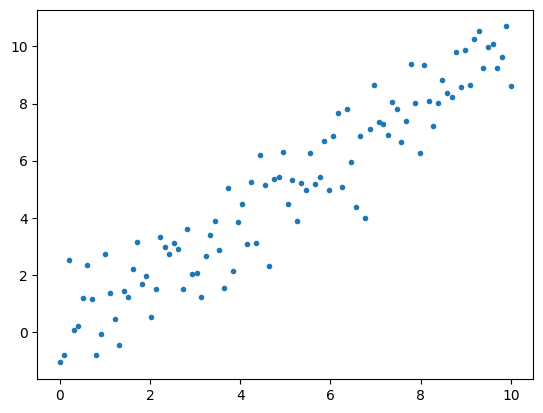

In [202]:
plt.plot(x,y, ".")

In [295]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.MLP1 = nn.Sequential(nn.Linear(100,100), nn.Sigmoid(),
                                 nn.Linear(100,100), nn.Sigmoid(),
                                 nn.Linear(100,100))
        self.MLP2 = nn.Sequential(nn.Linear(100,100), nn.Sigmoid(),
                                 nn.Linear(100,100), nn.Sigmoid(),
                                 nn.Linear(100,100),nn.Sigmoid())

    def forward(self,x):
        means = self.MLP1(x)
        stds = self.MLP2(x)
        y = means + 10*torch.randn(size=(100,))
    
        return y, means, stds

In [296]:
M = MLP()
optimizer = torch.optim.AdamW(M.parameters())
loss_fn = nn.MSELoss()

In [334]:
for epoch in range(10):
    out, _,_ = M(x)
    loss = loss_fn(out,y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad(set_to_none=True)
    print(loss)


tensor(97.0567, grad_fn=<MseLossBackward0>)
tensor(98.5507, grad_fn=<MseLossBackward0>)
tensor(108.9767, grad_fn=<MseLossBackward0>)
tensor(100.5164, grad_fn=<MseLossBackward0>)
tensor(84.0097, grad_fn=<MseLossBackward0>)
tensor(80.3111, grad_fn=<MseLossBackward0>)
tensor(115.1804, grad_fn=<MseLossBackward0>)
tensor(110.1961, grad_fn=<MseLossBackward0>)
tensor(95.5160, grad_fn=<MseLossBackward0>)
tensor(92.6735, grad_fn=<MseLossBackward0>)


In [335]:
z, means,stds = M(x)

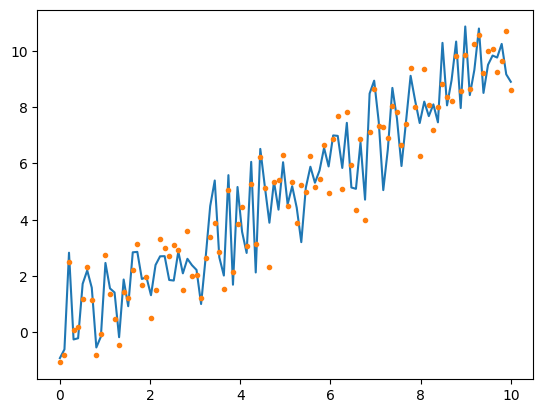

In [338]:
plt.plot(x,means.data)
plt.plot(x,y, ".")

In [96]:
z = []
for i in range(10000):
    z.append(torch.normal(torch.tensor(10.0),torch.tensor(1.0)))
    

In [118]:
torch.normal(torch.tensor([1.0,200]),torch.tensor(1.0)).requires_grad_()

tensor([  0.2977, 200.6220], requires_grad=True)

In [373]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.distributions import Normal

class VAE(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(VAE, self).__init__()

        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, latent_dim * 2)  # Output mean and log variance
        )

        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 64),
            nn.ReLU(),
            nn.Linear(64, input_dim)
        )

    def reparameterize(self, mean, log_var):
        std = torch.exp(0.5 * log_var)
        eps = torch.randn_like(std)
        z = mean + eps * std
        return z

    def forward(self, x):
        # Encoding
        enc_output = self.encoder(x)
        mean, log_var = torch.chunk(enc_output, 2, dim=-1)
        z = self.reparameterize(mean, log_var)

        # Decoding
        output = self.decoder(z)
        return output, mean, log_var

def loss_function(recon_x, x, mean, log_var):
    # Reconstruction loss
    recon_loss = nn.MSELoss()(recon_x, x)

    # KL divergence loss
    kl_loss = -0.5 * torch.mean(1 + log_var - mean.pow(2) - log_var.exp())

    return recon_loss + kl_loss

# Training
input_dim = 1  # Input dimension (x)
latent_dim = 1  # Latent dimension

# Generate training data
num_points = 1000
x_train = torch.linspace(-10, 10, num_points).view(-1, input_dim)
y_true = 3 * x_train + torch.randn_like(x_train)

# Create VAE model
vae = VAE(input_dim, latent_dim)

# Set up optimizer
optimizer = optim.Adam(vae.parameters(), lr=0.001)

# Training loop
num_epochs = 10000
for epoch in range(num_epochs):
    optimizer.zero_grad()

    # Forward pass
    recon_x, mean, log_var = vae(x_train)
    
    # Calculate loss
    loss = loss_function(recon_x, y_true, mean, log_var)
    
    # Backward pass
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch + 1, num_epochs, loss.item()))

# Inference
with torch.no_grad():
    x_test = torch.linspace(-10, 10, num_points).view(-1, input_dim)
    recon_x, mean, log_var = vae(x_test)
    y_mean = recon_x.squeeze()

    # Sample from the learned distribution
    posterior = Normal(mean, torch.exp(0.5 * log_var))
    num_samples = 100
    y_samples = posterior.sample(torch.Size([num_samples])).mean(dim=2).squeeze()

    # Plotting

    #     x


Epoch [100/10000], Loss: 43.0360
Epoch [200/10000], Loss: 24.0661
Epoch [300/10000], Loss: 16.8230
Epoch [400/10000], Loss: 13.2005
Epoch [500/10000], Loss: 10.8763
Epoch [600/10000], Loss: 9.3540
Epoch [700/10000], Loss: 8.3742
Epoch [800/10000], Loss: 7.6169
Epoch [900/10000], Loss: 7.0064
Epoch [1000/10000], Loss: 6.6549
Epoch [1100/10000], Loss: 6.3553
Epoch [1200/10000], Loss: 6.0415
Epoch [1300/10000], Loss: 5.7965
Epoch [1400/10000], Loss: 5.4940
Epoch [1500/10000], Loss: 5.4383
Epoch [1600/10000], Loss: 5.2722
Epoch [1700/10000], Loss: 5.0565
Epoch [1800/10000], Loss: 5.1343
Epoch [1900/10000], Loss: 5.0403
Epoch [2000/10000], Loss: 4.9162
Epoch [2100/10000], Loss: 4.8691
Epoch [2200/10000], Loss: 4.9076
Epoch [2300/10000], Loss: 4.9025
Epoch [2400/10000], Loss: 4.7314
Epoch [2500/10000], Loss: 4.7508
Epoch [2600/10000], Loss: 4.8257
Epoch [2700/10000], Loss: 4.6365
Epoch [2800/10000], Loss: 4.7452
Epoch [2900/10000], Loss: 4.6077
Epoch [3000/10000], Loss: 4.6183
Epoch [3100/10

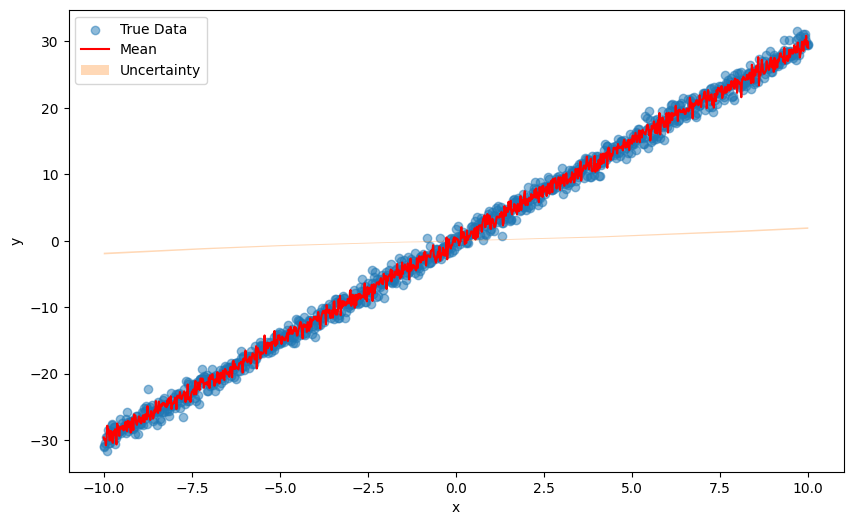

In [374]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(x_train.numpy(), y_true.numpy(), alpha=0.5, label='True Data')
plt.plot(x_test.numpy(), y_mean.numpy(), 'r-', label='Mean')
plt.fill_between(
    x_test.numpy().squeeze(),
    (mean.squeeze() - 2 * torch.exp(0.5 * log_var.squeeze())).numpy(),
    (mean.squeeze() + 2 * torch.exp(0.5 * log_var.squeeze())).numpy(),
    alpha=0.3,
    label='Uncertainty'
)

# for i in range(num_samples):
#     plt.plot(x_test.numpy().squeeze(), y_samples[i].numpy().squeeze(), 'g-', alpha=0.1)

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [390]:
import numpy as np
import torch
X = np.linspace(0,10,300)
Y = X + 0.25*X*np.random.normal(size=X.shape[0])

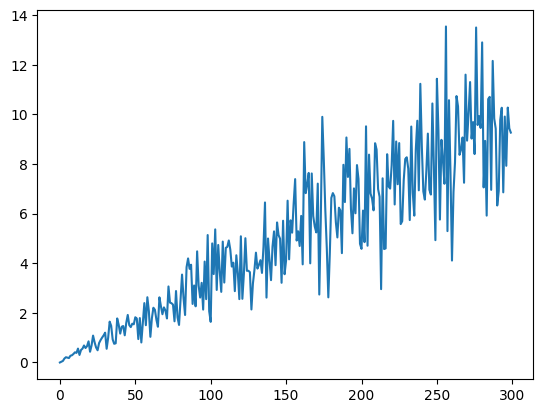

In [391]:
plt.plot(Y)

In [389]:
class Model(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.mean_coeff = torch.nn.Parameter(torch.Tensor([0]))
        self.var_coeff = torch.nn.Parameter(torch.Tensor([1]))

    def forward(self, x):
        return torch.distributions.Normal(self.mean_coeff*x, self.var_coeff * x)

mdl = Model()
optim = torch.optim.SGD(mdl.parameters(), lr=1e-3)

for _ in range(2000): # epochs
    dist = mdl(torch.from_numpy(X).float())
    obj = -dist.log_prob(torch.from_numpy(Y).float()).mean()
    optim.zero_grad()
    obj.backward()
    optim.step()
print(mdl.mean_coeff, mdl.var_coeff)
# tensor(1.0150) tensor(0.2597)

ValueError: Expected parameter scale (Tensor of shape (300,)) of distribution Normal(loc: torch.Size([300]), scale: torch.Size([300])) to satisfy the constraint GreaterThan(lower_bound=0.0), but found invalid values:
tensor([ 0.0000,  0.0334,  0.0669,  0.1003,  0.1338,  0.1672,  0.2007,  0.2341,
         0.2676,  0.3010,  0.3344,  0.3679,  0.4013,  0.4348,  0.4682,  0.5017,
         0.5351,  0.5686,  0.6020,  0.6355,  0.6689,  0.7023,  0.7358,  0.7692,
         0.8027,  0.8361,  0.8696,  0.9030,  0.9365,  0.9699,  1.0033,  1.0368,
         1.0702,  1.1037,  1.1371,  1.1706,  1.2040,  1.2375,  1.2709,  1.3043,
         1.3378,  1.3712,  1.4047,  1.4381,  1.4716,  1.5050,  1.5385,  1.5719,
         1.6054,  1.6388,  1.6722,  1.7057,  1.7391,  1.7726,  1.8060,  1.8395,
         1.8729,  1.9064,  1.9398,  1.9732,  2.0067,  2.0401,  2.0736,  2.1070,
         2.1405,  2.1739,  2.2074,  2.2408,  2.2742,  2.3077,  2.3411,  2.3746,
         2.4080,  2.4415,  2.4749,  2.5084,  2.5418,  2.5753,  2.6087,  2.6421,
         2.6756,  2.7090,  2.7425,  2.7759,  2.8094,  2.8428,  2.8763,  2.9097,
         2.9431,  2.9766,  3.0100,  3.0435,  3.0769,  3.1104,  3.1438,  3.1773,
         3.2107,  3.2441,  3.2776,  3.3110,  3.3445,  3.3779,  3.4114,  3.4448,
         3.4783,  3.5117,  3.5452,  3.5786,  3.6120,  3.6455,  3.6789,  3.7124,
         3.7458,  3.7793,  3.8127,  3.8462,  3.8796,  3.9130,  3.9465,  3.9799,
         4.0134,  4.0468,  4.0803,  4.1137,  4.1472,  4.1806,  4.2140,  4.2475,
         4.2809,  4.3144,  4.3478,  4.3813,  4.4147,  4.4482,  4.4816,  4.5150,
         4.5485,  4.5819,  4.6154,  4.6488,  4.6823,  4.7157,  4.7492,  4.7826,
         4.8161,  4.8495,  4.8829,  4.9164,  4.9498,  4.9833,  5.0167,  5.0502,
         5.0836,  5.1171,  5.1505,  5.1839,  5.2174,  5.2508,  5.2843,  5.3177,
         5.3512,  5.3846,  5.4181,  5.4515,  5.4850,  5.5184,  5.5518,  5.5853,
         5.6187,  5.6522,  5.6856,  5.7191,  5.7525,  5.7860,  5.8194,  5.8528,
         5.8863,  5.9197,  5.9532,  5.9866,  6.0201,  6.0535,  6.0870,  6.1204,
         6.1538,  6.1873,  6.2207,  6.2542,  6.2876,  6.3211,  6.3545,  6.3880,
         6.4214,  6.4548,  6.4883,  6.5217,  6.5552,  6.5886,  6.6221,  6.6555,
         6.6890,  6.7224,  6.7559,  6.7893,  6.8227,  6.8562,  6.8896,  6.9231,
         6.9565,  6.9900,  7.0234,  7.0569,  7.0903,  7.1237,  7.1572,  7.1906,
         7.2241,  7.2575,  7.2910,  7.3244,  7.3579,  7.3913,  7.4247,  7.4582,
         7.4916,  7.5251,  7.5585,  7.5920,  7.6254,  7.6589,  7.6923,  7.7258,
         7.7592,  7.7926,  7.8261,  7.8595,  7.8930,  7.9264,  7.9599,  7.9933,
         8.0268,  8.0602,  8.0936,  8.1271,  8.1605,  8.1940,  8.2274,  8.2609,
         8.2943,  8.3278,  8.3612,  8.3946,  8.4281,  8.4615,  8.4950,  8.5284,
         8.5619,  8.5953,  8.6288,  8.6622,  8.6957,  8.7291,  8.7625,  8.7960,
         8.8294,  8.8629,  8.8963,  8.9298,  8.9632,  8.9967,  9.0301,  9.0635,
         9.0970,  9.1304,  9.1639,  9.1973,  9.2308,  9.2642,  9.2977,  9.3311,
         9.3645,  9.3980,  9.4314,  9.4649,  9.4983,  9.5318,  9.5652,  9.5987,
         9.6321,  9.6656,  9.6990,  9.7324,  9.7659,  9.7993,  9.8328,  9.8662,
         9.8997,  9.9331,  9.9666, 10.0000], grad_fn=<MulBackward0>)

In [398]:
import numpy as np

# Observed data
x = np.array([1, 2, 3, 4, 5])
# y = np.array([2, 4, 6, 8, 10])
y = np.exp(x)

# Design matrix
X = np.vstack((x, np.ones(len(x)))).T

# Prior assumptions
prior_mean = np.zeros(2)  # Assume zero mean for slope and intercept
prior_cov = np.eye(2)  # Assume identity covariance for simplicity

# Compute posterior parameters
posterior_cov = np.linalg.inv(np.linalg.inv(prior_cov) + X.T @ X)
posterior_mean = posterior_cov @ (np.linalg.inv(prior_cov) @ prior_mean + X.T @ y)

# Generate new x-values for prediction
x_pred = np.array([6, 7, 8, 9, 10])

# Compute predicted y-values
X_pred = np.vstack((x_pred, np.ones(len(x_pred)))).T
y_pred_mean = X_pred @ posterior_mean

# Print the estimated parameters
slope, intercept = posterior_mean
print(f"Estimated slope: {slope}")
print(f"Estimated intercept: {intercept}")

# Print the predicted y-values
print("Predicted y-values:")
for i in range(len(x_pred)):
    print(f"x = {x_pred[i]}, y = {y_pred_mean[i]}")


Estimated slope: 24.605456241924205
Estimated intercept: -22.64627660709415
Predicted y-values:
x = 6, y = 124.98646084445109
x = 7, y = 149.5919170863753
x = 8, y = 174.19737332829948
x = 9, y = 198.8028295702237
x = 10, y = 223.40828581214788


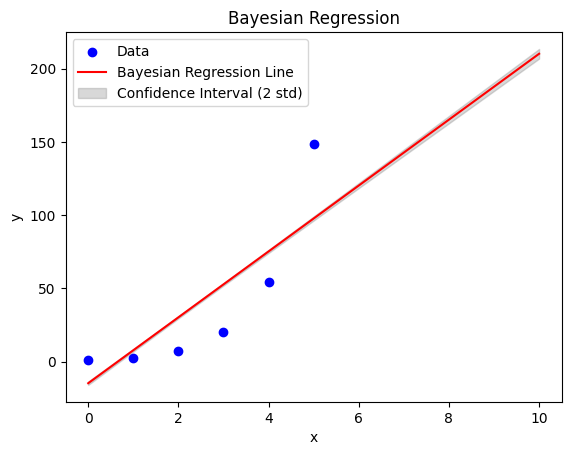

In [401]:
import numpy as np
import matplotlib.pyplot as plt

# Observed data
x = np.array([0,1, 2, 3, 4, 5])
y = np.exp(x)

# Design matrix
X = np.vstack((x, np.ones(len(x)))).T

# Prior assumptions
prior_mean = np.zeros(2)  # Assume zero mean for slope and intercept
prior_cov = np.eye(2)  # Assume identity covariance for simplicity

# Compute posterior parameters
posterior_cov = np.linalg.inv(np.linalg.inv(prior_cov) + X.T @ X)
posterior_mean = posterior_cov @ (np.linalg.inv(prior_cov) @ prior_mean + X.T @ y)

# Generate new x-values for prediction
x_pred = np.array([0,1, 2, 3, 4, 5,6, 7, 8, 9, 10])

# Compute predicted y-values and uncertainty bounds
X_pred = np.vstack((x_pred, np.ones(len(x_pred)))).T
y_pred_mean = X_pred @ posterior_mean
y_pred_std = np.sqrt(np.sum(X_pred @ posterior_cov * X_pred, axis=1))

# Plotting
plt.figure()
plt.scatter(x, y, color='blue', label='Data')
plt.plot(x_pred, y_pred_mean, color='red', label='Bayesian Regression Line')
plt.fill_between(x_pred, y_pred_mean - 2 * y_pred_std, y_pred_mean + 2 * y_pred_std,
                 color='gray', alpha=0.3, label='Confidence Interval (2 std)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Bayesian Regression')
plt.legend()
plt.show()


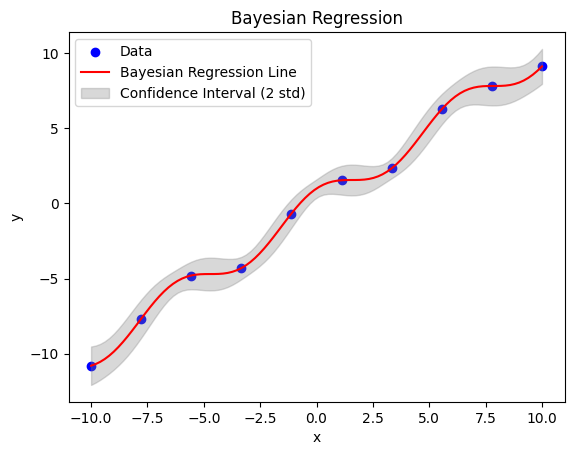

In [461]:
import numpy as np
import matplotlib.pyplot as plt

# Observed data
x = np.linspace(-10,10,10)
y = np.cos(x) + x

# Design matrix
X = np.vstack((np.cos(x) + x, np.sin(x), np.ones(len(x)))).T

# Prior assumptions
prior_mean = np.zeros(3)  # Assume zero mean for cosine amplitude, frequency, and intercept
prior_cov = np.eye(3)  # Assume identity covariance for simplicity

# Compute posterior parameters
posterior_cov = np.linalg.inv(np.linalg.inv(prior_cov) + X.T @ X)
posterior_mean = posterior_cov @ (np.linalg.inv(prior_cov) @ prior_mean + X.T @ y)

# Generate new x-values for prediction
x_pred = np.linspace(-10, 10, 100)

# Compute predicted y-values and uncertainty bounds
X_pred = np.vstack((np.cos(x_pred) + x_pred, np.sin(x_pred), np.ones(len(x_pred)))).T
y_pred_mean = X_pred @ posterior_mean
y_pred_std = np.sqrt(np.sum(X_pred @ posterior_cov * X_pred, axis=1))

# Plotting
plt.figure()
plt.scatter(x, y, color='blue', label='Data')
plt.plot(x_pred, y_pred_mean, color='red', label='Bayesian Regression Line')
plt.fill_between(x_pred, y_pred_mean - 2 * y_pred_std, y_pred_mean + 2 * y_pred_std,
                 color='gray', alpha=0.3, label='Confidence Interval (2 std)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Bayesian Regression')
plt.legend()
plt.show()


In [460]:
posterior_cov, posterior_mean

(array([[2.42438888e-03, 8.04555548e-04, 2.44288667e-04],
        [8.04555548e-04, 1.63027426e-01, 8.10694209e-05],
        [2.44288667e-04, 8.10694209e-05, 9.09337062e-02]]),
 array([ 9.97575611e-01, -8.04555548e-04, -2.44288667e-04]))

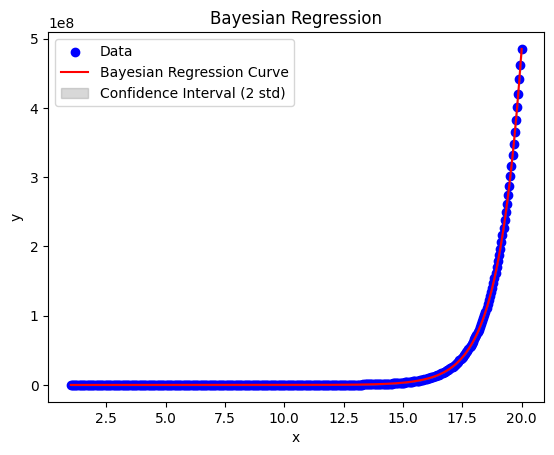

In [423]:
import numpy as np
import matplotlib.pyplot as plt

# Observed data
x = np.linspace(1,20,400)
# y = np.array([1.0, 0.5, 0.333, 0.25, 0.2])
y = np.exp(x) + 1/x

# Design matrix
X = np.vstack((np.exp(x) + 1/x, np.ones(len(x)))).T

# Prior assumptions
prior_mean = np.zeros(2)  # Assume zero mean for coefficient and intercept
prior_cov = np.eye(2)  # Assume identity covariance for simplicity

# Compute posterior parameters
posterior_cov = np.linalg.inv(np.linalg.inv(prior_cov) + X.T @ X)
posterior_mean = posterior_cov @ (np.linalg.inv(prior_cov) @ prior_mean + X.T @ y)

# Generate new x-values for prediction
x_pred = np.linspace(1,20,1000)

# Compute predicted y-values and uncertainty bounds
X_pred = np.vstack((np.exp(x_pred) + 1/x_pred, np.ones(len(x_pred)))).T
y_pred_mean = X_pred @ posterior_mean
y_pred_std = np.sqrt(np.sum(X_pred @ posterior_cov * X_pred, axis=1))

# Plotting
plt.figure()
plt.scatter(x, y, color='blue', label='Data')
plt.plot(x_pred, y_pred_mean, color='red', label='Bayesian Regression Curve')
plt.fill_between(x_pred, y_pred_mean - 2 * y_pred_std, y_pred_mean + 2 * y_pred_std,
                 color='gray', alpha=0.3, label='Confidence Interval (2 std)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Bayesian Regression')
plt.legend()
plt.show()


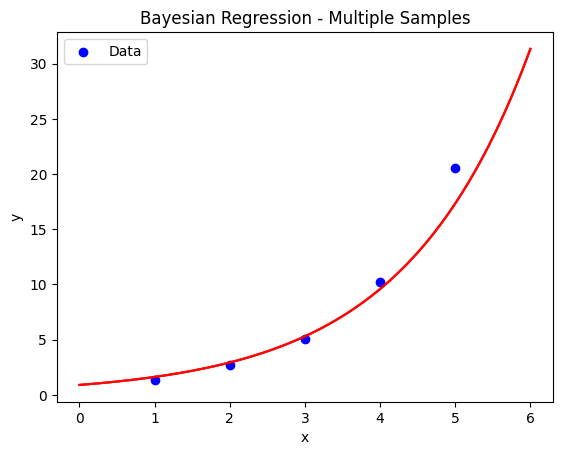

In [426]:
import numpy as np
import matplotlib.pyplot as plt

# Observed data
x = np.array([1, 2, 3, 4, 5])
y = np.array([1.3, 2.7, 5.1, 10.2, 20.5])

# Design matrix
X = np.vstack((x, np.ones(len(x)))).T

# Prior assumptions
prior_mean = np.zeros(2)  # Assume zero mean for coefficient and intercept
prior_cov = np.eye(2)  # Assume identity covariance for simplicity

# Number of samples from posterior
num_samples = 10

# Generate new x-values for prediction
x_pred = np.linspace(0, 6, 100)

# Plotting
plt.figure()
plt.scatter(x, y, color='blue', label='Data')

# Sample from the posterior and plot regression curves
for _ in range(num_samples):
    # Compute posterior parameters
    posterior_cov = np.linalg.inv(np.linalg.inv(prior_cov) + X.T @ X)
    posterior_mean = posterior_cov @ (np.linalg.inv(prior_cov) @ prior_mean + X.T @ np.log(y))

    # Compute predicted y-values
    X_pred = np.vstack((x_pred, np.ones(len(x_pred)))).T
    y_pred_mean = np.exp(X_pred @ posterior_mean)

    # Plot regression curve
    plt.plot(x_pred, y_pred_mean, color='red', alpha=0.3)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Bayesian Regression - Multiple Samples')
plt.legend()
plt.show()


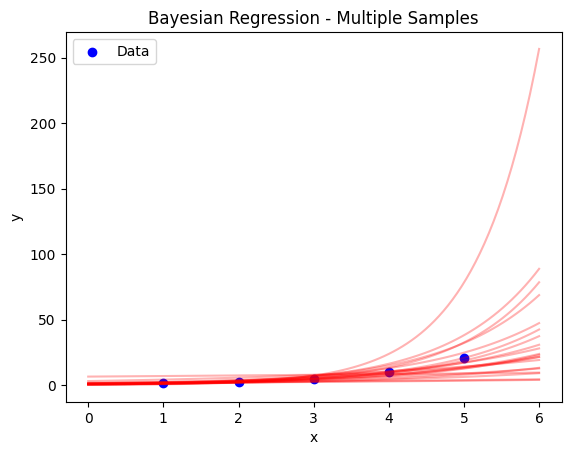

In [439]:
import numpy as np
import matplotlib.pyplot as plt

# Observed data
x = np.array([1, 2, 3, 4, 5])
y = np.array([1.3, 2.7, 5.1, 10.2, 20.5])

# Design matrix
X = np.vstack((x, np.ones(len(x)))).T

# Prior assumptions
prior_mean = np.zeros(2)   # Assume zero mean for coefficient and intercept
prior_cov = np.eye(2)  # Assume identity covariance for simplicity

# Number of samples from posterior
num_samples = 20

# Generate new x-values for prediction
x_pred = np.linspace(0, 6, 100)

# Plotting
plt.figure()
plt.scatter(x, y, color='blue', label='Data')

# Sample from the posterior and plot regression curves
for _ in range(num_samples):
    # Sample regression parameters from the posterior distribution
    posterior_samples = np.random.multivariate_normal(posterior_mean, posterior_cov)

    # Compute predicted y-values
    X_pred = np.vstack((x_pred, np.ones(len(x_pred)))).T
    y_pred_mean = np.exp(X_pred @ posterior_samples)

    # Plot regression curve
    plt.plot(x_pred, y_pred_mean, color='red', alpha=0.3)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Bayesian Regression - Multiple Samples')
plt.legend()
plt.show()
